# Geographic Data Visualization

## Preliminary Setup and Visualization

### Imports

In [123]:
import geoplot as gplt
import geopandas as gpd
import geoplot.crs as gcrs
import imageio
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import mapclassify as mc
import numpy as np
import random

### Reading Data

In [4]:
boston = gpd.read_file('./data/geographic-data/climate-ready/c7230a7a-4081-4743-b911-e18f66e1beca2020330-1-17gw6be.a4ds.shp')
boston.head(1)

,FID,GEOID10,AREA_SQFT,AREA_ACRES,POP100_RE,HU100_RE,TotDis,TotChild,OlderAdult,Low_to_No,LEP,POC2,MedIllnes,Name,Shape__Are,Shape__Len,geometry
0,1,25025010405,3914567.54,89.8661,5522,994,470,60,331,1191,1522,1755,2131.22,Mission Hill,666100.0,6036.192907,"POLYGON ((-7913698.771 5212638.332, -7913724.4..."


In [5]:
boston.columns

Index(['FID', 'GEOID10', 'AREA_SQFT', 'AREA_ACRES', 'POP100_RE', 'HU100_RE',
       'TotDis', 'TotChild', 'OlderAdult', 'Low_to_No', 'LEP', 'POC2',
       'MedIllnes', 'Name', 'Shape__Are', 'Shape__Len', 'geometry'],
      dtype='object')

#### Data Description: Summary of Vulnerability Attributes in Boston Climate Data

This dataset provides key attributes to analyze climate vulnerabilities in Boston neighborhoods. Below is a brief summary of each attribute:

- **Older Adults (OlderAdult):** Population over 65 years, vulnerable due to medical illnesses, functional limitations, and social isolation.  
  *Data Source:* 2008–2012 ACS 5-year Estimates.

- **Children (TotChild):** Population under 5 years, requiring additional resources during disasters.  
  *Data Source:* 2010 ACS 5-year Estimates.

- **People of Color (POC2):** Non-white population more likely to experience compounded risks due to poverty, language barriers, and urban heat islands.  
  *Data Source:* 2008–2012 ACS 5-year Estimates.

- **Limited English Proficiency (LEP):** Residents with limited English skills facing challenges in receiving and acting on emergency information.  
  *Data Source:* 2008–2012 ACS 5-year Estimates.

- **Low to No Income (Low_to_No):** Households at or near the poverty line, limited in disaster preparation and recovery resources.  
  *Data Source:* 2008–2012 ACS 5-year Estimates.

- **People with Disabilities (TotDis):** Population with physical, sensory, or cognitive disabilities more likely to face barriers in evacuation and recovery.  
  *Data Source:* 2008–2012 ACS 5-year Estimates.

- **Medical Illness (MedIllnes):** Residents with health conditions exacerbated by extreme heat or disrupted healthcare during disasters.  
  *Data Source:* EASI modeled data using U.S. Census Bureau statistics.

Other attributes include:
- **Geographic Information:** `GEOID10` (Census tract identifier), `Name` (Neighborhood name), `geometry` (Spatial data).  
- **Area Information:** `AREA_SQFT` (Area in square feet), `AREA_ACRES` (Area in acres).  
- **Population Information:** `POP100_RE` (Population count), `HU100_RE` (Housing unit count).  


In [6]:
boston.drop(columns=['FID', 'GEOID10', 'AREA_SQFT'], inplace=True)

renamer = {
    'AREA_ACRES': 'AreaAcres',
    'POP100_RE': 'PopulationCount',
    'HU100_RE': 'HousingUnitCount',
    'TotDis': 'PeopleWithDisabilities',
    'TotChild': 'ChildrenUnder5',
    'OlderAdult': 'OlderAdults',
    'Low_to_No': 'LowIncomeHouseholds',
    'LEP': 'LowEnglishProficiency',
    'POC2': 'PeopleOfColor',
    'MedIllnes': 'MedicalIllnessCount',
}


In [7]:
boston.rename(columns=renamer, inplace=True)

In [8]:
boston.head(1)

,AreaAcres,PopulationCount,HousingUnitCount,PeopleWithDisabilities,ChildrenUnder5,OlderAdults,LowIncomeHouseholds,LowEnglishProficiency,PeopleOfColor,MedicalIllnessCount,Name,Shape__Are,Shape__Len,geometry
0,89.8661,5522,994,470,60,331,1191,1522,1755,2131.22,Mission Hill,666100.0,6036.192907,"POLYGON ((-7913698.771 5212638.332, -7913724.4..."


### Basic Visualization 

<Axes: >

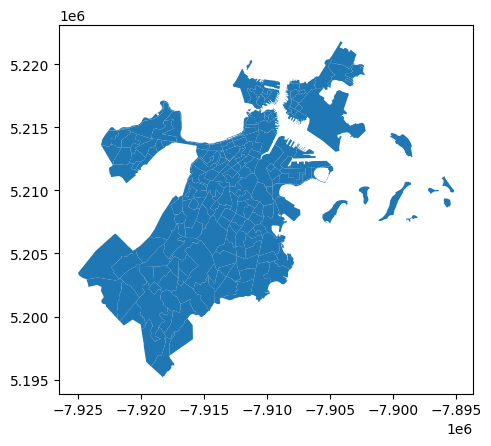

In [9]:
boston.plot()

In [10]:
b_ns = list(pd.unique(boston.Name))
b_ns

['Mission Hill',
 'Fenway',
 'Back Bay',
 'Allston',
 'Brighton',
 'Jamaica Plain',
 'Roslindale',
 'Hyde Park',
 'West Roxbury',
 'Mattapan',
 'Dorchester',
 'East Boston',
 'North End',
 'West End',
 'Longwood Medical Area',
 'Roxbury',
 'South Boston Waterfront',
 'Charlestown',
 'South End',
 'Bay Village',
 'Leather District',
 'South Boston',
 'Harbor Islands']

<Axes: >

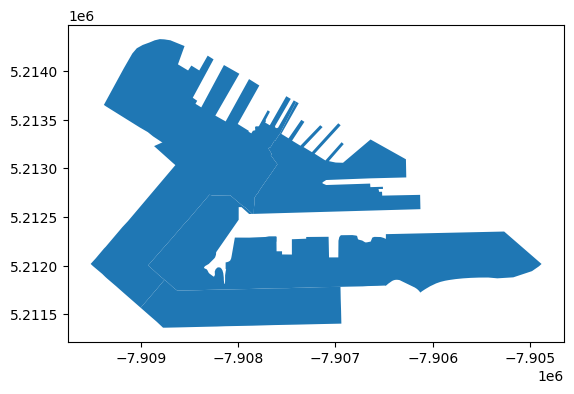

In [11]:
boston[boston.Name == "South Boston Waterfront"].plot()

### More Advanced Visualization

#### Medical Illness Template

In [12]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [109]:
def add_neighborhood_labels(df, ax, font_sz=6, lw=1):
    neighborhood_points = {}
    for _, row in boston.iterrows():
        x, y = row.geometry.centroid.x, row.geometry.centroid.y
        name = row.Name
        if name not in neighborhood_points:
            neighborhood_points[name] = [(x, y)]
        else:
            neighborhood_points[name].append((x, y))
    
    centroids = {}
    for name in neighborhood_points:
        points = neighborhood_points[name]
        sum_x, sum_y = 0, 0
        for point in points:
            sum_x += point[0]
            sum_y += point[1]
        den = len(points)
        centroid = (sum_x / den, sum_y / den)
        centroids[name] = centroid
    
    for name in centroids:
        x, y = centroids[name]
        text = ax.text(x, y, name, fontsize=font_sz, ha='center', va='center', color='k', weight='bold')
        text.set_path_effects([
            path_effects.Stroke(linewidth=lw, foreground='w'),
            path_effects.Normal()
        ])

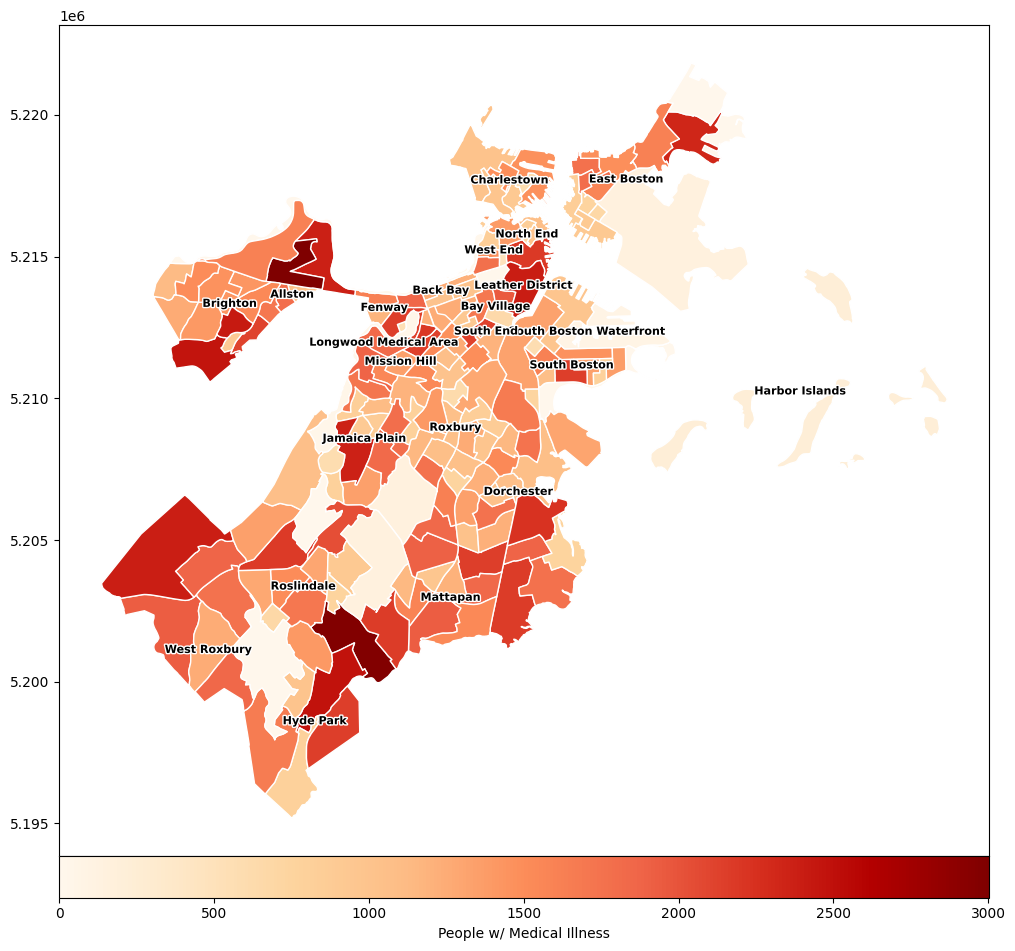

In [110]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad=0.0)

boston.plot(
    column="MedicalIllnessCount",
    cmap='OrRd',
    edgecolor="w",
    ax=ax,
    legend=True,
    cax=cax,
    legend_kwds={"label": "People w/ Medical Illness", "orientation": "horizontal"}
)

add_neighborhood_labels(boston, ax, font_sz=8, lw=2)


plt.show()

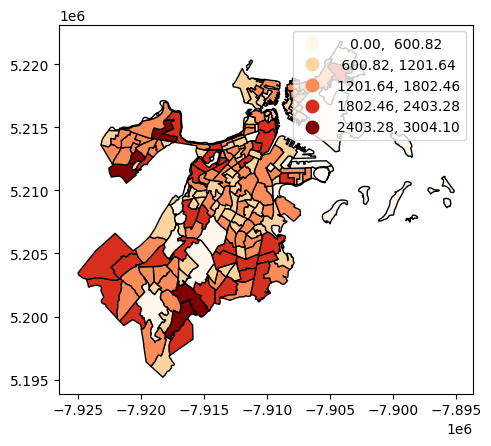

In [112]:
boston.plot(
    column="MedicalIllnessCount",
    cmap='OrRd',
    edgecolor='k',
    scheme='equal_interval',
    legend=True
)

ax.set_axis_off()

#### Graphing All Features in Likewise Fashion

In [15]:
def create_plots_for_features(gdf, features):
    columns = 2
    rows = -(-len(features) // columns)
    fig, axs = plt.subplots(rows, columns, figsize=(16, rows*8))
    axs = axs.flatten()
    for i, feature in enumerate(features):
        ax = axs[i]
        gdf.plot(
            ax=ax,
            column=feature,
            cmap='OrRd',
            edgecolor='k',
            scheme='equal_interval',
            legend=True
        )
        ax.set_axis_off()
        ax.set_title(feature)

    for j in range(len(features), len(axs)):
        axs[j].set_visible(False)
    
    return fig

In [16]:
features_to_graph = [f for f in list(boston.columns) if f not in ['Name', 'Shape__Are', 'Shape__Len', 'geometry', 'GEOID10', 'FID']]

/tmp/ipykernel_174779/3384610196.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


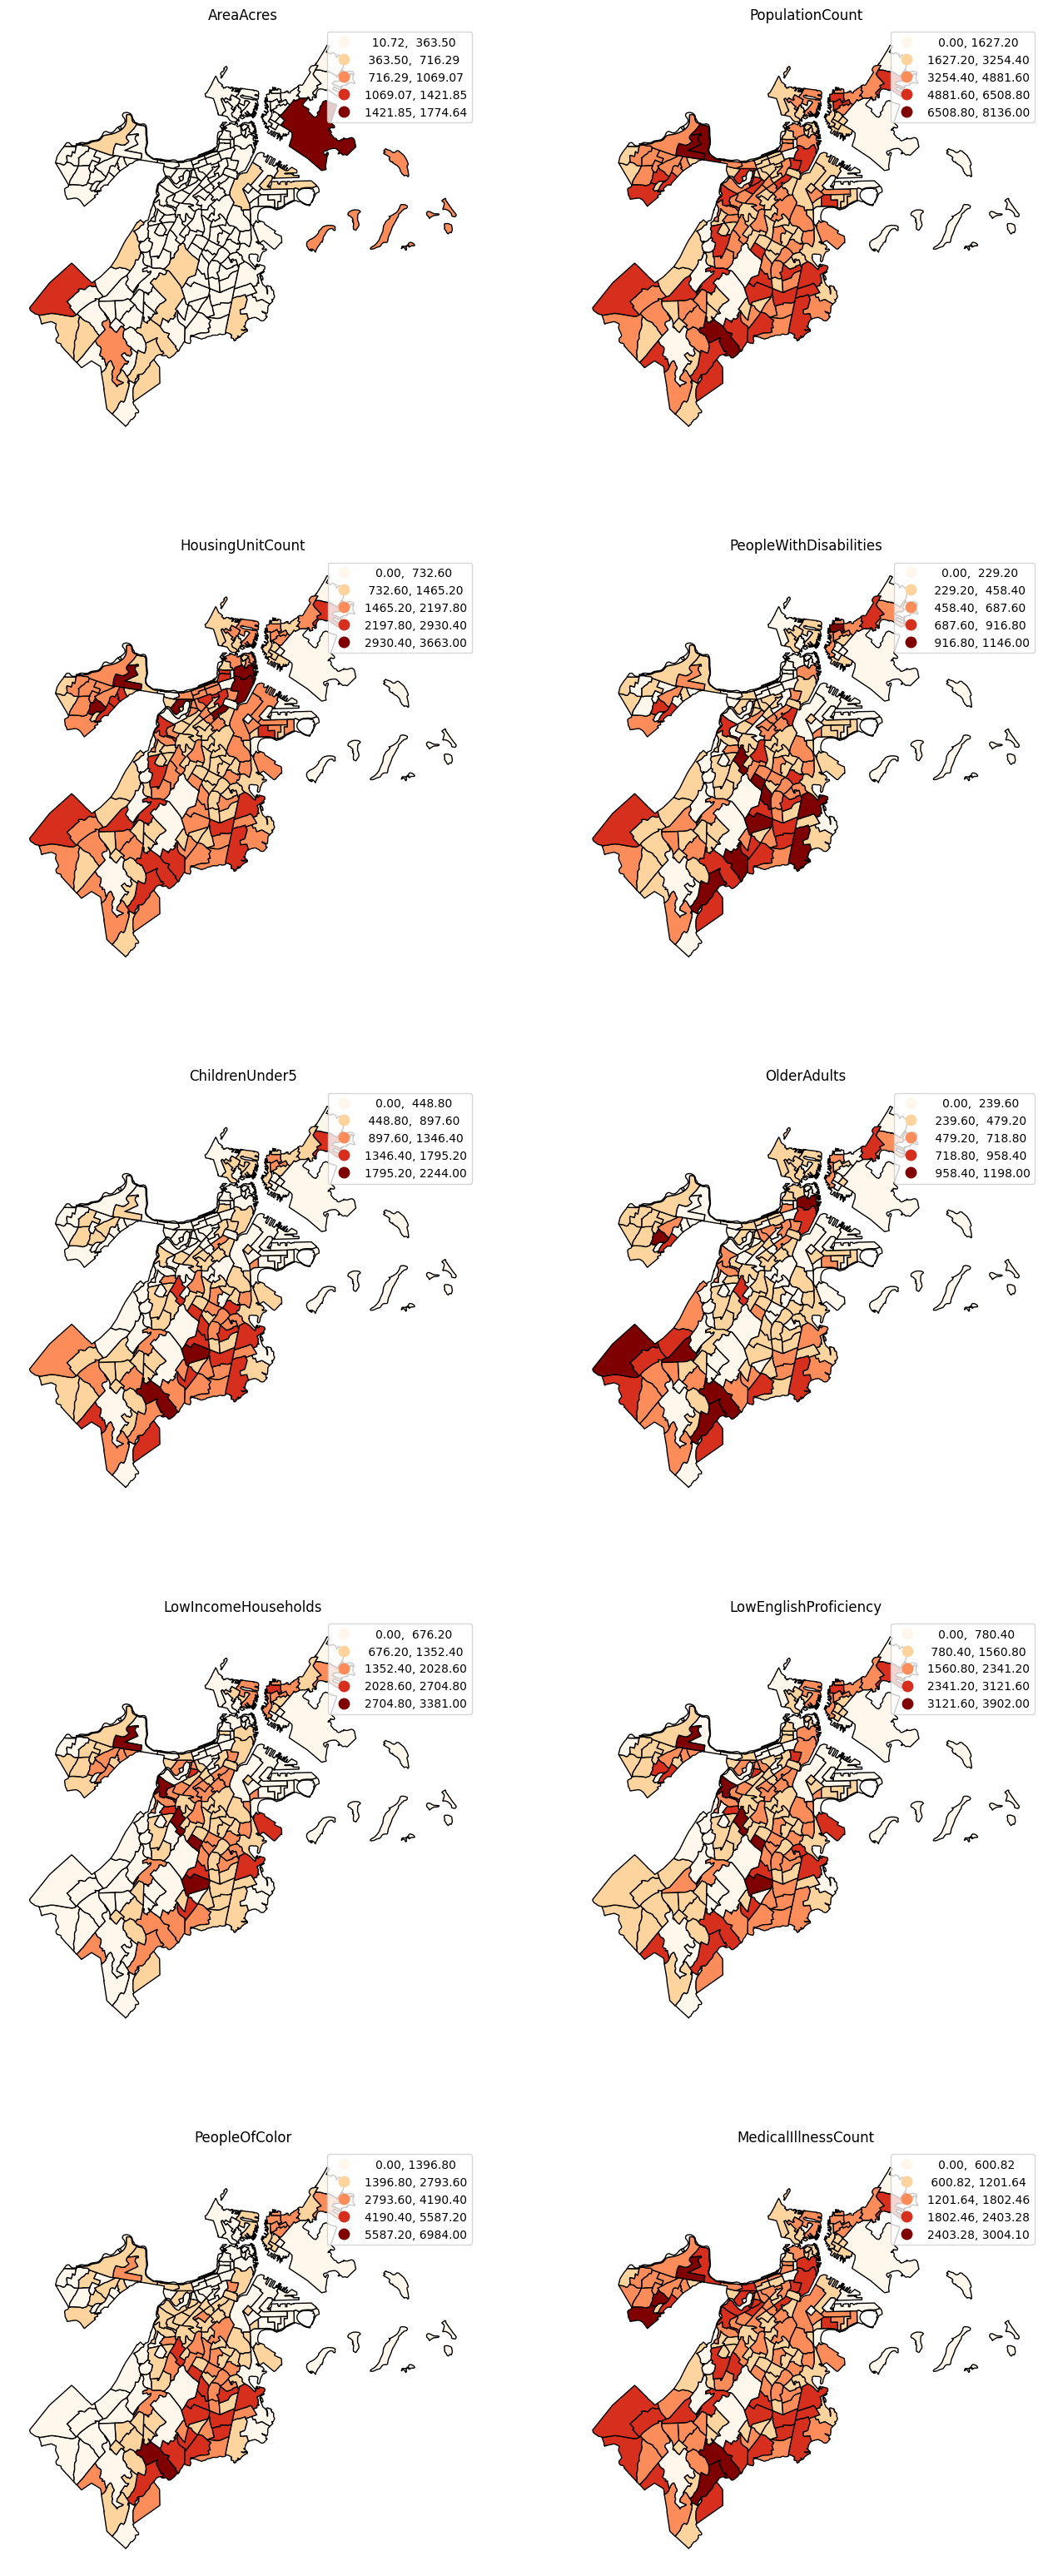

In [17]:
fig = create_plots_for_features(boston, features_to_graph)
fig.show()

## Merging Data

### Merging Childcare Data

#### Link to Data

https://data.boston.gov/dataset/boston-opportunity-agenda-state-of-early-early-education-and-care/

#### Data Definitions

| Field                        | Definition                                                                                     |
|------------------------------|------------------------------------------------------------------------------------------------|
| **Neighborhoods**             | 15 neighborhoods, as defined by this report                                                      |
| **PopBto5**                   | Population (in household) birth to 5 years old in that neighborhood                            |
| **Pop0to2**                   | Population (in household) birth to 2 years old in that neighborhood                            |
| **Pop3to5**                   | Population (in household) 3 to 5 years old in that neighborhood                                |
| **ParentLabFor**              | Population 0-5 years old with all parents in labor force in that neighborhood                   |
| **WhitePer**                  | Share of children (%) 0 - 4 years old that are White, non-Hispanic (Race/Ethnicity) in that neighborhood |
| **BlackPer**                  | Share of children (%) 0 - 4 years old that are Black (Race/Ethnicity) in that neighborhood      |
| **LatinxPer**                 | Share of children (%) 0 - 4 years old that are Hispanic or Latino (Race/Ethnicity) in that neighborhood |
| **AsianPer**                  | Share of children (%) 0 - 4 years old that are Asian (Race/Ethnicity) in that neighborhood      |
| **MarFam**                    | Share of married couple families (5) for children 0 - 5 years old (Family Type) in that neighborhood |
| **MalFam**                    | Share of male householder families (%) for children 0 - 5 years old (Family Type) in that neighborhood |
| **FemFam**                    | Share of female householder families (%) for children 0 - 5 years old (Family Type) in that neighborhood |
| **PovPer**                    | Share of children (%) 0 - 5 years old living in poverty (Poverty Status) in that neighborhood   |
| **MedianIncome**              | Median Family Income in the past 12 months (in 2017 inflation-adjusted dollars) in that neighborhood |
| **InfCostCareMedInc**         | Average cost of infant care as a percentage of median family income in that neighborhood        |
| **PreCostCareMedInc**         | Average cost of preschool care as a percentage of median family income in that neighborhood      |
| **InfCarAfford**              | Share of families that cannot afford infant care in that neighborhood                           |
| **PreCareAfford**             | Share of families that cannot afford preschool care in that neighborhood                        |

### Notes

- **Record Type**: Each record represents a ZIP-Code defined neighborhood. See list below for detailed information on Boston ZIP-Codes used to create each of the 15 neighborhoods.
- **Data Quality**: Numbers presented here came from 2013-2017 American Community Survey data. Therefore, these are **estimates** and have margin of errors. The smaller the geographical unit, the greater the margin of error. The Boston Planning & Development Agency analyzed the data to estimate numbers by ZIP-Code.
- **Race/Ethnicity**: Racial/ethnic subsets will not add to the total. Non-white Hispanic children may be double-counted.
- **Cost of Care**: The average cost of care as a percentage of median family income was computed assuming the annual average cost of infant care was **\$19,877** and the average cost of preschool care was **\$13,771** (Childcare Aware of America, 2019). For each neighborhood, we estimated the impact of child care (infant and preschool) on its median annual family income.
- **Affordability**: The Department of Health and Human Services (DHHS) sets a standard regarding the affordability of child care, where the annual cost of child care should not exceed **10%** of household annual income. Using this 10% threshold, we estimated that to afford market rate infant care, a family’s annual income would have to be at least **\$198,770**. The census income bracket closest to this income was a family income of **\$150,000–199,999**. To afford preschool care, a family's annual income should be at least **\$137,710**. Thus, the census income bracket that encompasses this income is **\$125,000 - 149,999**. For both infant and preschool care, we underestimated the number of families that can afford care.


In [18]:
childcare_data = pd.read_csv('./data/geographic-data/childcare-affordability-data.csv')

In [19]:
childcare_data.head(1)

,Neighborhoods,PopBto5,Pop0to2,Pop3to5,ParentLabFor,WhitePer,BlackPer,LatinxPer,AsianPer,MarFam,MalFam,FemFam,PovPer,MedianIncome,InfCostCareMedInc,PreCostCareMedInc,InfCarAfford,PreCareAfford,Unnamed: 18
0,Allston/Brighton,"2,619","1,527","1,092","1,833",41%,10%,20%,19%,76%,1%,24%,19%,"$75,777",26%,18%,83%,74%,NaN


In [20]:
list(childcare_data.columns)

['Neighborhoods',
 'PopBto5',
 'Pop0to2',
 'Pop3to5',
 'ParentLabFor',
 'WhitePer',
 ' BlackPer',
 ' LatinxPer',
 ' AsianPer',
 ' MarFam',
 ' MalFam',
 ' FemFam',
 ' PovPer',
 'MedianIncome',
 'InfCostCareMedInc',
 'PreCostCareMedInc',
 'InfCarAfford',
 'PreCareAfford',
 'Unnamed: 18']

In [21]:
childcare_data.shape

(998, 19)

In [22]:
childcare_data.dropna(how='all', inplace=True)

In [23]:
childcare_data.shape

(16, 19)

In [24]:
childcare_data.head(1)

,Neighborhoods,PopBto5,Pop0to2,Pop3to5,ParentLabFor,WhitePer,BlackPer,LatinxPer,AsianPer,MarFam,MalFam,FemFam,PovPer,MedianIncome,InfCostCareMedInc,PreCostCareMedInc,InfCarAfford,PreCareAfford,Unnamed: 18
0,Allston/Brighton,"2,619","1,527","1,092","1,833",41%,10%,20%,19%,76%,1%,24%,19%,"$75,777",26%,18%,83%,74%,NaN


In [25]:
childcare_data.drop(columns="Unnamed: 18", inplace=True)

In [26]:
childcare_data["Neighborhoods"]

0         Allston/Brighton
1     Back Bay/Beacon Hill
2           Central Boston
3              Charlestown
4               Dorchester
5              East Boston
6           Fenway/Kenmore
7                Hyde Park
8            Jamaica Plain
9                 Mattapan
10              Roslindale
11                 Roxbury
12            South Boston
13               South End
14            West Roxbury
15                  Boston
Name: Neighborhoods, dtype: object

In [27]:
def separate_ns(df):
    result_rows = []

    for _, row in df.iterrows():
        ns = str(row["Neighborhoods"]).split("/")
        for n in ns:
            new_row = row.copy()
            new_row["Neighborhoods"] = n
            result_rows.append(new_row)
            
    new_df = pd.DataFrame(result_rows)
    return new_df

childcare_data = separate_ns(childcare_data)

In [28]:
cd_ns = list(childcare_data["Neighborhoods"])
cd_ns

['Allston',
 'Brighton',
 'Back Bay',
 'Beacon Hill',
 'Central Boston',
 'Charlestown',
 'Dorchester',
 'East Boston',
 'Fenway',
 'Kenmore',
 'Hyde Park',
 'Jamaica Plain',
 'Mattapan',
 'Roslindale',
 'Roxbury',
 'South Boston',
 'South End',
 'West Roxbury',
 'Boston']

In [29]:
set(cd_ns).intersection(b_ns)

{'Allston',
 'Back Bay',
 'Brighton',
 'Charlestown',
 'Dorchester',
 'East Boston',
 'Fenway',
 'Hyde Park',
 'Jamaica Plain',
 'Mattapan',
 'Roslindale',
 'Roxbury',
 'South Boston',
 'South End',
 'West Roxbury'}

In [30]:
set(cd_ns).difference(b_ns)

{'Beacon Hill', 'Boston', 'Central Boston', 'Kenmore'}

In [31]:
set(b_ns).difference(cd_ns)

{'Bay Village',
 'Harbor Islands',
 'Leather District',
 'Longwood Medical Area',
 'Mission Hill',
 'North End',
 'South Boston Waterfront',
 'West End'}

In [32]:
rename = {"Beacon Hill": "North End", "Central Boston": "Leather District", "Kenmore": "Fenway"}
g = lambda x: rename[x] if x in rename else x
childcare_data["Neighborhoods"] = childcare_data["Neighborhoods"].apply(g)

In [33]:
set(list(childcare_data["Neighborhoods"])).difference(b_ns)

{'Boston'}

In [34]:
bos_cc = gpd.GeoDataFrame(pd.merge(boston, childcare_data, how='left',  left_on="Name", right_on="Neighborhoods"))

In [35]:
bos_cc = bos_cc.rename(columns={
    'WhitePer': 'WhitePct',
    ' BlackPer': 'BlackPct',
    ' LatinxPer': 'LatinxPct',
    ' AsianPer': 'AsianPct',
    ' MarFam': 'MarriedFamiliesPct',
    ' MalFam': 'MaleHouseholdsPct',
    ' FemFam': 'FemaleHouseholdsPct',
    ' PovPer': 'PovertyPct',
    'InfCarAfford': 'NotAffordInfantCare',
    'PreCareAfford': 'NotAffordPrecare',
    'InfCostCareMedInc': 'InfantCareToMedianIncomeRatio',
    'PreCostCareMedInc': 'PrecareMedianIncomeRatio'
    
})

In [126]:
list(bos_cc.columns)

['AreaAcres',
 'PopulationCount',
 'HousingUnitCount',
 'PeopleWithDisabilities',
 'ChildrenUnder5',
 'OlderAdults',
 'LowIncomeHouseholds',
 'LowEnglishProficiency',
 'PeopleOfColor',
 'MedicalIllnessCount',
 'Name',
 'Shape__Are',
 'Shape__Len',
 'geometry',
 'Neighborhoods',
 'PopBto5',
 'Pop0to2',
 'Pop3to5',
 'ParentLabFor',
 'WhitePct',
 'BlackPct',
 'LatinxPct',
 'AsianPct',
 'MarriedFamiliesPct',
 'MaleHouseholdsPct',
 'FemaleHouseholdsPct',
 'PovertyPct',
 'MedianIncome',
 'InfantCareToMedianIncomeRatio',
 'PrecareMedianIncomeRatio',
 'NotAffordInfantCare',
 'NotAffordPrecare']

In [37]:
def convert_pcts(df, features):
    g = lambda x: float(x.strip('%')) / 100
    for f in features:
        df[f] = df[f].apply(
            lambda x: g(x) if pd.notna(x) and type(x) == str else x
        )

convert_pcts(bos_cc, [
    'WhitePct', 'BlackPct',
    'LatinxPct', 'AsianPct',
    'MarriedFamiliesPct', 'MaleHouseholdsPct',
    'FemaleHouseholdsPct', 'PovertyPct',
    'InfantCareToMedianIncomeRatio', 'NotAffordPrecare',
    'PrecareMedianIncomeRatio', 'NotAffordInfantCare'
])

In [38]:
def convert_dollars(df, features):
    g = lambda x: float(''.join(x.strip('$').split(',')))
    for f in features:
        df[f] = df[f].apply(
            lambda x: g(x) if pd.notna(x) and type(x) == str else x
        )

convert_dollars(bos_cc, ['MedianIncome'])

<Axes: >

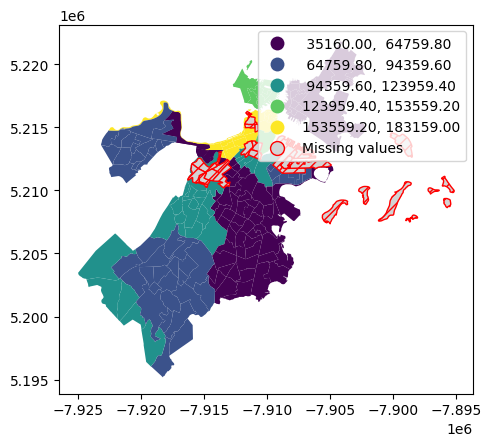

In [39]:
bos_cc.plot(
    column="MedianIncome",
    legend=True,
    scheme="equal_interval",
    missing_kwds={
        "color": "lightgrey",
        "edgecolor": "red",
        "hatch": "///",
        "label": "Missing values",
    }
)

### Merging Boston Neighborhood Data

In [40]:
n_data = pd.read_csv(
    './data/geographic-data/boston-neighborhood-data-2020.csv',
    header=1    
)

In [41]:
n_data.head()

,field concept,Total:,White alone,Black or African American alone,Hispanic or Latino,"Asian, Native Hawaiian and Pacific Islander alone, all ages","Other Races or Multiple Races, all ages",Total:.1,White alone.1,Black or African American alone.1,...,Nursing facilities/Skilled-nursing facilities,Other institutional facilities,Noninstitutionalized population:,College/University student housing,Military quarters,Other noninstitutional facilities,Total:.3,Occupied,Vacant,household size
0,Allston,24904,12536,1326,3259,6271,1512,23140,11976,1184,...,0,0,3281,3214,0,67,10748,10027,721,2.156478
1,Back Bay,18190,13065,690,1208,2410,817,17042,12349,641,...,269,0,1610,1487,0,123,11524,10006,1518,1.630122
2,Beacon Hill,9336,7521,252,537,630,396,8603,6980,231,...,0,0,33,0,0,33,6037,5485,552,1.696080
3,Brighton,52047,32694,2414,5376,8703,2860,47657,30752,2076,...,266,56,3796,3493,0,303,23653,22535,1118,2.126292
4,Charlestown,19120,13626,990,2075,1650,779,15661,11689,662,...,55,0,55,0,30,25,9525,8932,593,2.128303


In [42]:
n_data_features = list(n_data.columns)
for i, name in enumerate(n_data_features):
    print(i, name)

0 field concept
1 Total:
2 White alone
3 Black or African American alone
4 Hispanic or Latino
5 Asian, Native Hawaiian and Pacific Islander alone, all ages
6 Other Races or Multiple Races,  all ages
7 Total:.1
8 White alone.1
9 Black or African American alone.1
10 Hispanic or Latino.1
11 Asian, Native Hawaiian and Pacific Islander alone, aged 18+
12 Other Races or Multiple Races, aged 18+
13 Total: aged 0-17
14 White alone, aged 0-17
15 Black or African American alone, aged 0-17
16 Hispanic or Latino, aged 0-17
17 Asian, Native Hawaiian and Pacific Islander alone, aged 0-17
18 Other Races or Multiple Races, aged 0-17
19 household population
20 Total:.2
21 Institutionalized population:
22 Correctional facilities for adults
23 Juvenile facilities
24 Nursing facilities/Skilled-nursing facilities
25 Other institutional facilities
26 Noninstitutionalized population:
27 College/University student housing
28 Military quarters
29 Other noninstitutional facilities
30 Total:.3
31 Occupied
32 Vac

In [43]:
fs = n_data_features
desired_features = [fs[0], fs[1], fs[2], fs[3], fs[4], fs[5], fs[6], fs[21], fs[22], fs[23], fs[24], fs[27], fs[28], fs[31], fs[32], fs[33]]
n_data = n_data[desired_features]

In [44]:
n_data.columns

Index(['field concept', 'Total:', 'White alone',
       'Black or African American alone', 'Hispanic or Latino',
       'Asian, Native Hawaiian and Pacific Islander alone, all ages',
       'Other Races or Multiple Races,  all ages',
       'Institutionalized population:', 'Correctional facilities for adults',
       'Juvenile facilities', 'Nursing facilities/Skilled-nursing facilities',
       'College/University student housing', 'Military quarters', 'Occupied',
       'Vacant', 'household size'],
      dtype='object')

In [45]:
n_data = n_data.rename(columns={
    'field concept': 'Name',
    'Total:': 'Total',
    'White alone': 'WhiteAl',
    'Black or African American alone': 'BlackAl',
    'Asian, Native Hawaiian and Pacific Islander alone, all ages': 'AsianAl',
    'Hispanic or Latino': 'Latino',
    'Other Races or Multiple Races,  all ages': 'Mixed',
    'Institutionalized population:': 'InstitutionalizedPop',
    'Correctional facilities for adults': 'CorrectionalFacilitiesAdult',
    'Juvenile facilities': 'CorrectionalFacilitiesJuvenile',
    'Nursing facilities/Skilled-nursing facilities': 'NursingFacilities',
    'College/University student housing': 'UnivHousing',
    'Military quarters': 'MilitaryQuarters',
     'household size': 'HouseholdSize'
})

In [46]:
n_data.head()

,Name,Total,WhiteAl,BlackAl,Latino,AsianAl,Mixed,InstitutionalizedPop,CorrectionalFacilitiesAdult,CorrectionalFacilitiesJuvenile,NursingFacilities,UnivHousing,MilitaryQuarters,Occupied,Vacant,HouseholdSize
0,Allston,24904,12536,1326,3259,6271,1512,0,0,0,0,3214,0,10027,721,2.156478
1,Back Bay,18190,13065,690,1208,2410,817,269,0,0,269,1487,0,10006,1518,1.630122
2,Beacon Hill,9336,7521,252,537,630,396,0,0,0,0,0,0,5485,552,1.696080
3,Brighton,52047,32694,2414,5376,8703,2860,335,0,13,266,3493,0,22535,1118,2.126292
4,Charlestown,19120,13626,990,2075,1650,779,55,0,0,55,0,30,8932,593,2.128303


In [47]:
set(n_data["Name"]).difference(b_ns)

{'Beacon Hill', 'Chinatown', 'Downtown', 'Longwood'}

In [48]:
rename = {"Beacon Hill": "North End",
          "Chinatown": "Leather District",
          "Longwood": "Mission Hill",
          "Downtown": "Leather District"}
g = lambda x: rename[x] if x in rename else x
n_data["Name"] = n_data["Name"].apply(g)

In [49]:
set(n_data["Name"]).difference(b_ns)

set()

In [150]:
boston_nd = gpd.GeoDataFrame(pd.merge(boston, n_data, how='left',  left_on="Name", right_on="Name"))

In [128]:
bos_cc_nd = gpd.GeoDataFrame(pd.merge(bos_cc, n_data, how='left',  left_on="Name", right_on="Name"))
bos_cc_nd.head()

,AreaAcres,PopulationCount,HousingUnitCount,PeopleWithDisabilities,ChildrenUnder5,OlderAdults,LowIncomeHouseholds,LowEnglishProficiency,PeopleOfColor,MedicalIllnessCount,...,Mixed,InstitutionalizedPop,CorrectionalFacilitiesAdult,CorrectionalFacilitiesJuvenile,NursingFacilities,UnivHousing,MilitaryQuarters,Occupied,Vacant,HouseholdSize
0,89.8661,5522,994,470,60,331,1191,1522,1755,2131.22,...,175.0,0.0,0.0,0.0,0.0,4624.0,0.0,317.0,49.0,1.772871
1,89.8661,5522,994,470,60,331,1191,1522,1755,2131.22,...,800.0,116.0,0.0,4.0,112.0,1502.0,0.0,6668.0,287.0,2.361278
2,33.8089,5817,1862,299,77,56,2387,2443,1749,2201.14,...,2035.0,314.0,53.0,0.0,261.0,14960.0,0.0,13273.0,1352.0,1.658254
3,33.8089,5817,1862,299,77,56,2387,2443,1749,2201.14,...,2035.0,314.0,53.0,0.0,261.0,14960.0,0.0,13273.0,1352.0,1.658254
4,31.6039,2783,1899,84,281,390,72,462,447,1214.76,...,817.0,269.0,0.0,0.0,269.0,1487.0,0.0,10006.0,1518.0,1.630122


In [129]:
for feature in list(bos_cc_nd.columns):
    print(feature, end=' ')

AreaAcres
PopulationCount
HousingUnitCount
PeopleWithDisabilities
ChildrenUnder5
OlderAdults
LowIncomeHouseholds
LowEnglishProficiency
PeopleOfColor
MedicalIllnessCount
Name
Shape__Are
Shape__Len
geometry
Neighborhoods
PopBto5
Pop0to2
Pop3to5
ParentLabFor
WhitePct
BlackPct
LatinxPct
AsianPct
MarriedFamiliesPct
MaleHouseholdsPct
FemaleHouseholdsPct
PovertyPct
MedianIncome
InfantCareToMedianIncomeRatio
PrecareMedianIncomeRatio
NotAffordInfantCare
NotAffordPrecare
Total
WhiteAl
BlackAl
Latino
AsianAl
Mixed
InstitutionalizedPop
CorrectionalFacilitiesAdult
CorrectionalFacilitiesJuvenile
NursingFacilities
UnivHousing
MilitaryQuarters
Occupied
Vacant
HouseholdSize


<Axes: >

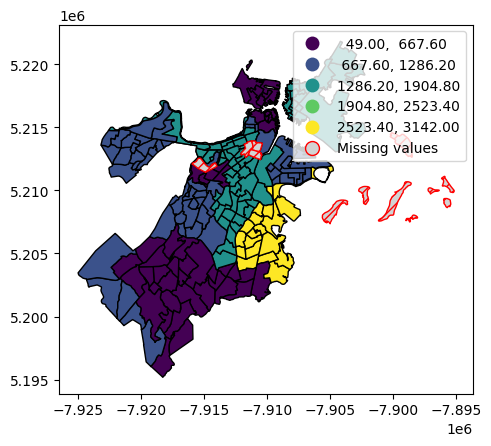

In [130]:
bos_cc_nd.plot(
    column="Vacant",
    legend=True,
    scheme="equal_interval",
    edgecolor='k',
    missing_kwds={
        "color": "lightgrey",
        "edgecolor": "red",
        "hatch": "///",
        "label": "Missing values",
    }
)

## Feature Engineering

In [131]:
# Population density (persons per square mile)
square_mile_of_acre = lambda x: x * 0.0015625
bos_cc_nd['PopulationDensity'] = bos_cc_nd['PopulationCount'] / (square_mile_of_acre (bos_cc_nd['AreaAcres']))

In [132]:
# MedicalIllness controlled by population
bos_cc_nd['IllnessPerCapita'] = bos_cc_nd['MedicalIllnessCount'] / bos_cc_nd['PopulationCount']

In [133]:
# Vacant number of houses moderated by number of occupied hosues
bos_cc_nd['VacantRatio'] = bos_cc_nd['Vacant'] / (bos_cc_nd['Vacant'] + bos_cc_nd['Occupied'])

In [134]:
bos_cc_nd['LowEnglishProficiencyRate'] = bos_cc_nd['LowEnglishProficiency'] / bos_cc_nd['PopulationCount']

In [135]:
bos_cc_nd['TotalCorrectionalFacilities'] = bos_cc_nd['CorrectionalFacilitiesAdult'] + bos_cc_nd['CorrectionalFacilitiesJuvenile']

In [136]:
bos_cc_nd['DisabledRate'] = bos_cc_nd['PeopleWithDisabilities'] / bos_cc_nd['PopulationCount']

In [137]:
bos_cc_nd['OlderAdultPct'] = bos_cc_nd['OlderAdults'] / bos_cc_nd['PopulationCount']

In [138]:
bos_cc_nd['HousesPerCapita'] = bos_cc_nd['HousingUnitCount'] / bos_cc_nd['PopulationCount']

In [144]:
bos_cc_nd.dtypes

AreaAcres                          float64
PopulationCount                      int32
HousingUnitCount                     int32
PeopleWithDisabilities               int32
ChildrenUnder5                       int32
OlderAdults                          int32
LowIncomeHouseholds                  int32
LowEnglishProficiency                int32
PeopleOfColor                        int32
MedicalIllnessCount                float64
Name                                object
Shape__Are                         float64
Shape__Len                         float64
geometry                          geometry
Neighborhoods                       object
PopBto5                             object
Pop0to2                             object
Pop3to5                             object
ParentLabFor                        object
WhitePct                           float64
BlackPct                           float64
LatinxPct                          float64
AsianPct                           float64
MarriedFami

In [154]:
output_directory = "./geographical-plots"
os.makedirs(output_directory, exist_ok=True)

bos_cc_nd_features = [f for f in list(bos_cc_nd.columns) if f not in
            ['Name', 'Shape__Are',
             'Shape__Len', 'geometry',
             'GEOID10', 'FID',
             'Neighborhoods', 'ParentLabFor',
             'PopBto5', 'Pop0to2',
             'Pop3to5']
           ]

color_schemes = [
    "RdBu", "Blues", "Greens", "Reds", "OrRd"
]

def make_graphs(df, features):
    for feature in features:
        print("Working on " + feature)
        fig, ax = plt.subplots(figsize=(14, 14))
        
        df.plot(
            ax=ax,
            column=feature,
            cmap=random.choice(color_schemes),
            legend=True,
            scheme="quantiles",
            edgecolor='k',
            missing_kwds={
                "color": "lightgrey",
                "edgecolor": "red",
                "hatch": "///",
                "label": "Missing values",
            }
        )
    
        add_neighborhood_labels(df, ax, font_sz=5)
        
        title = ''.join([' ' + char if char.isupper() else char for char in feature]).strip()
        ax.set_title(title, fontsize=16, weight='bold')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_frame_on(False)
    
        plot_path = os.path.join(output_directory, f"{feature}.png")
        fig.savefig(plot_path, bbox_inches="tight", dpi=300)
        plt.close(fig)
    print(f"Plots saved to {output_directory}")

boston_nd_features = [f for f in bos_cc_nd_features if f in list(boston_nd.columns)]
bos_cc_nd_features = [f for f in bos_cc_nd_features if f not in boston_nd_features]

make_graphs(boston_nd, boston_nd_features)
make_graphs(bos_cc_nd, bos_cc_nd_features)

Working on AreaAcres
Working on PopulationCount
Working on HousingUnitCount
Working on PeopleWithDisabilities
Working on ChildrenUnder5
Working on OlderAdults
Working on LowIncomeHouseholds
Working on LowEnglishProficiency
Working on PeopleOfColor
Working on MedicalIllnessCount
Working on Total
Working on WhiteAl
Working on BlackAl
Working on Latino
Working on AsianAl
Working on Mixed
Working on InstitutionalizedPop
Working on CorrectionalFacilitiesAdult


/home/james/Documents/BU/Fall2024/CS506/Assignments/venv/lib/python3.12/site-packages/mapclassify/classifiers.py:1653: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 3.
  self.bins = quantile(y, k=k)


Working on CorrectionalFacilitiesJuvenile
Working on NursingFacilities
Working on UnivHousing


/home/james/Documents/BU/Fall2024/CS506/Assignments/venv/lib/python3.12/site-packages/mapclassify/classifiers.py:1653: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 4.
  self.bins = quantile(y, k=k)


Working on MilitaryQuarters


/home/james/Documents/BU/Fall2024/CS506/Assignments/venv/lib/python3.12/site-packages/mapclassify/classifiers.py:1653: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 2.
  self.bins = quantile(y, k=k)


Working on Occupied
Working on Vacant
Working on HouseholdSize
Plots saved to ./geographical-plots
Working on WhitePct
Working on BlackPct
Working on LatinxPct
Working on AsianPct
Working on MarriedFamiliesPct
Working on MaleHouseholdsPct
Working on FemaleHouseholdsPct
Working on PovertyPct
Working on MedianIncome
Working on InfantCareToMedianIncomeRatio
Working on PrecareMedianIncomeRatio
Working on NotAffordInfantCare
Working on NotAffordPrecare
Working on PopulationDensity
Working on IllnessPerCapita
Working on VacantRatio
Working on LowEnglishProficiencyRate
Working on TotalCorrectionalFacilities
Working on DisabledRate
Working on OlderAdultPct
Working on HousesPerCapita
Plots saved to ./geographical-plots
